In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasından verileri okuma
def read_data_from_csv(csv_file):
    try:
        # Veri setini oku ve 'Tarih' sütununu datetime olarak tanımla
        data = pd.read_csv(csv_file, parse_dates=['Tarih'])
        return data
    except FileNotFoundError:
        print("Hata: Belirtilen dosya bulunamadı. Lütfen dosya yolunu kontrol edin.")
        return None
    except Exception as e:
        print("Beklenmeyen bir hata oluştu:", str(e))
        return None

# Scatter plot oluşturma
def create_scatter_plot(data):
    if data is None or data.empty:
        print("Veri bulunamadı veya filtrelenmiş veri seti boş.")
        return
    
    try:
        # Scatter plot çizimi
        plt.figure(figsize=(12, 8))
        plt.scatter(data['Tarih'], data['HC Hava Sıcaklığı [°C]'], color='red', label='HC Hava Sıcaklığı [°C]', s=50)
        plt.scatter(data['Tarih'], data['HC Nispi Nem [%]'], color='blue', label='HC Nispi Nem [%]', s=50)
        plt.scatter(data['Tarih'], data['Yaprak Islaklığı [min]'], color='green', label='Yaprak Islaklığı [min]', s=50)
        plt.scatter(data['Tarih'], data['Dew Point [°C]'], color='orange', label='Dew Point [°C]', s=50)
        plt.scatter(data['Tarih'], data['VPD [kPa]'], color='purple', label='VPD [kPa]', s=50)
        
        # Eksen ve başlık ayarları
        plt.xlabel('Tarih')
        plt.ylabel('Değer')
        plt.title('Tarih ile Diğer Değerler Arasındaki İlişki')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except KeyError as e:
        print("Hata: Belirli sütun adları bulunamadı -", str(e))
    except Exception as e:
        print("Beklenmeyen bir hata oluştu:", str(e))

# Ana işlev
def main():
    csv_file = "station_data1.csv"  # CSV dosyasının yolunu belirtin
    
    # CSV dosyasını oku
    data = read_data_from_csv(csv_file)
    
    if data is not None:
        # Scatter plot'u oluştur
        create_scatter_plot(data)

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasından verileri okuma
def read_data_from_csv(csv_file):
    try:
        # Veri setini oku ve 'Tarih' sütununu datetime olarak tanımla
        data = pd.read_csv(csv_file, parse_dates=['Tarih'])
        return data
    except FileNotFoundError:
        print("Hata: Belirtilen dosya bulunamadı. Lütfen dosya yolunu kontrol edin.")
        return None
    except Exception as e:
        print("Beklenmeyen bir hata oluştu:", str(e))
        return None

# Scatter plot oluşturma
def create_scatter_plot(data):
    if data is None or data.empty:
        print("Veri bulunamadı veya filtrelenmiş veri seti boş.")
        return
    
    try:
        # Belirli koşulları sağlayan ve sağlamayan verileri ayırma      ------->   BAĞDA KÜLLEME HASTALIĞI VERİSİ (TOB)
        filtered_data = data[
            (data['HC Hava Sıcaklığı [°C]'] >= 20) & 
            (data['HC Hava Sıcaklığı [°C]'] <= 30) & 
            (data['HC Nispi Nem [%]'] >= 90) | 
            (data['Yaprak Islaklığı [min]'] >= 600) & 
            (data['Dew Point [°C]'] > 1.5) & 
            (data['VPD [kPa]'] > 0.01)
        ]
        
        # Scatter plot çizimi
        plt.figure(figsize=(12, 8))
        
        # Tüm verileri çiz
        plt.scatter(data['Tarih'], data['HC Hava Sıcaklığı [°C]'], color='gray', alpha=0.5, label='Diğer Tüm Veriler', s=100)
        
        # Belirli koşulları sağlayan noktaları çarpı işareti (x) olarak çiz
        plt.scatter(filtered_data['Tarih'], filtered_data['HC Hava Sıcaklığı [°C]'], color='red', label='Belirli Koşulları Sağlayan Noktalar', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['HC Nispi Nem [%]'], color='blue', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['Yaprak Islaklığı [min]'], color='green', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['Dew Point [°C]'], color='orange', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['VPD [kPa]'], color='purple', marker='x', s=100)
        
        # Eksen ve başlık ayarları
        plt.xlabel('Tarih')
        plt.ylabel('Değer')
        plt.title('Belirli Koşulları Sağlayan Noktaları Tarih İle İşaretlemek')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except KeyError as e:
        print("Hata: Belirli sütun adları bulunamadı -", str(e))
    except Exception as e:
        print("Beklenmeyen bir hata oluştu:", str(e))

# Ana işlev
def main():
    csv_file = "station_data1.csv"  # CSV dosyasının yolunu belirtin
    
    # CSV dosyasını oku
    data = read_data_from_csv(csv_file)
    
    if data is not None:
        # Scatter plot'u oluştur
        create_scatter_plot(data)

if __name__ == "__main__":
    main()


Doğruluk: 0.96
Hassasiyet: 0.78
Duyarlılık: 0.78
F1 Skoru: 0.78
AUC Skoru: 0.98


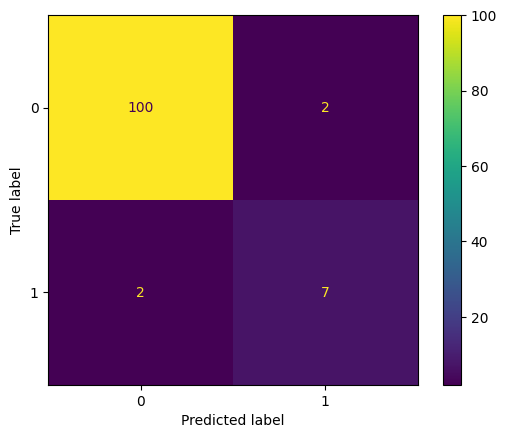

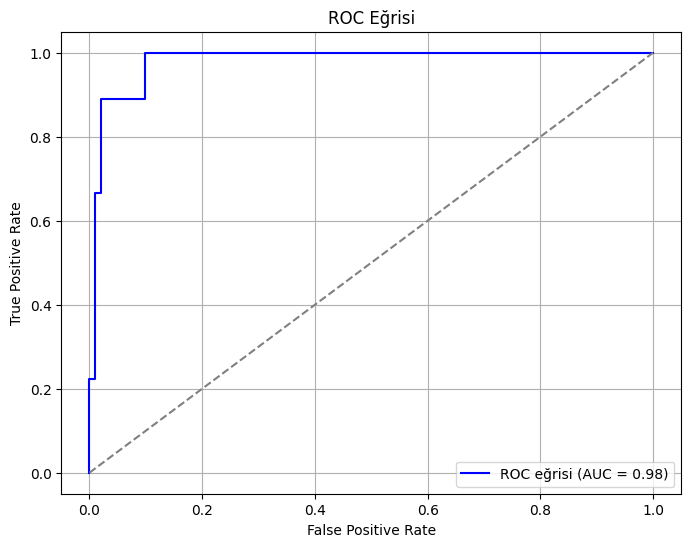

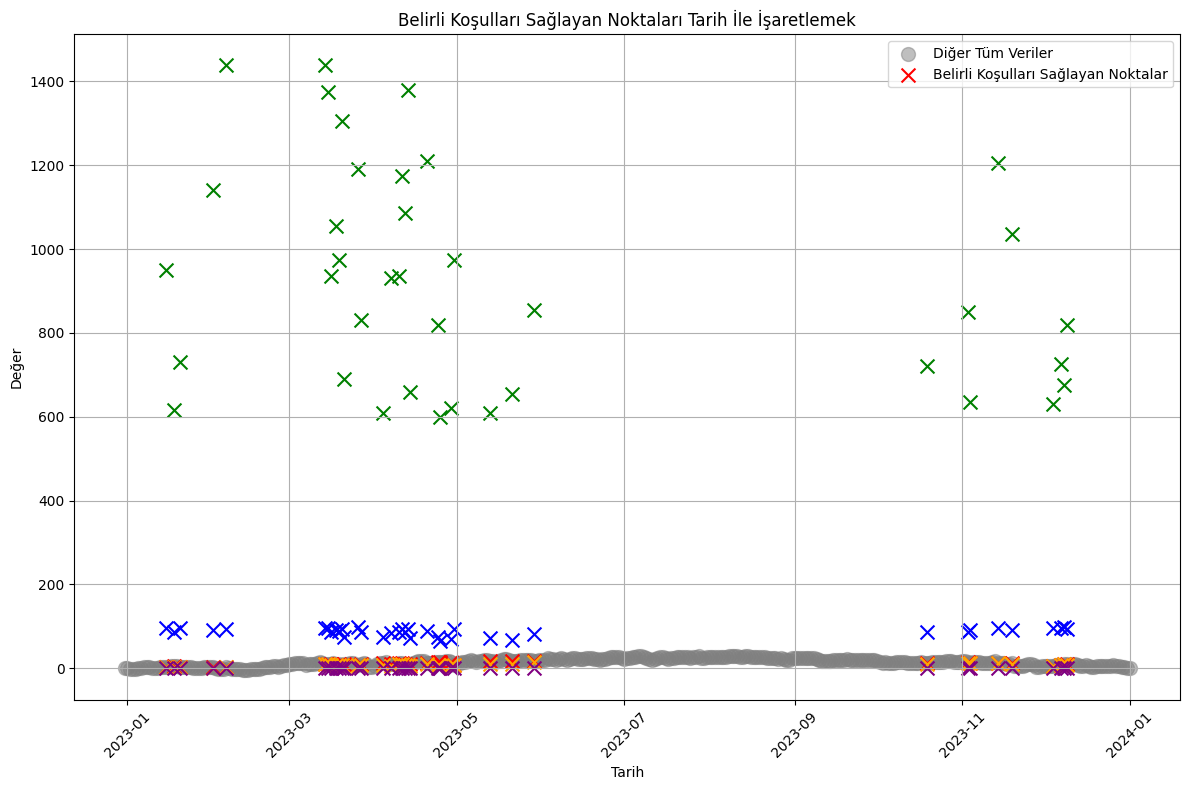

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer

# CSV dosyasından verileri okuma
def read_data_from_csv(csv_file):
    try:
        data = pd.read_csv(csv_file, parse_dates=['Tarih'])
        return data
    except FileNotFoundError:
        print("Hata: Belirtilen dosya bulunamadı. Lütfen dosya yolunu kontrol edin.")
        return None
    except Exception as e:
        print("Beklenmeyen bir hata oluştu:", str(e))
        return None

# Hedef değişkeni oluşturma
def create_target_variable(data):
    data['Hastalık'] = ((data['HC Hava Sıcaklığı [°C]'] >= 20) & 
                        (data['HC Hava Sıcaklığı [°C]'] <= 30) & 
                        (data['HC Nispi Nem [%]'] >= 90) | 
                        (data['Yaprak Islaklığı [min]'] >= 600) & 
                        (data['Dew Point [°C]'] > 1.5) & 
                        (data['VPD [kPa]'] > 0.01)).astype(int)
    return data

# Eksik verileri doldurma ve modeli eğitme
def train_model(data):
    features = ['HC Hava Sıcaklığı [°C]', 'HC Nispi Nem [%]', 'Yaprak Islaklığı [min]', 'Dew Point [°C]', 'VPD [kPa]']
    X = data[features]
    y = data['Hastalık']
    
    # Eksik değerleri ortalama ile doldurma
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Doğruluk: {accuracy:.2f}")
    print(f"Hassasiyet: {precision:.2f}")
    print(f"Duyarlılık: {recall:.2f}")
    print(f"F1 Skoru: {f1:.2f}")
    print(f"AUC Skoru: {roc_auc:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    # ROC eğrisi çizimi
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC eğrisi (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Eğrisi')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model

# Scatter plot oluşturma
def create_scatter_plot(data):
    if data is None or data.empty:
        print("Veri bulunamadı veya filtrelenmiş veri seti boş.")
        return
    
    try:
        # Belirli koşulları sağlayan ve sağlamayan verileri ayırma
        filtered_data = data[
            (data['HC Hava Sıcaklığı [°C]'] >= 20) & 
            (data['HC Hava Sıcaklığı [°C]'] <= 30) & 
            (data['HC Nispi Nem [%]'] >= 90) | 
            (data['Yaprak Islaklığı [min]'] >= 600) & 
            (data['Dew Point [°C]'] > 1.5) & 
            (data['VPD [kPa]'] > 0.01)
        ]
        
        # Scatter plot çizimi
        plt.figure(figsize=(12, 8))
        
        # Tüm verileri çiz
        plt.scatter(data['Tarih'], data['HC Hava Sıcaklığı [°C]'], color='gray', alpha=0.5, label='Diğer Tüm Veriler', s=100)
        
        # Belirli koşulları sağlayan noktaları çarpı işareti (x) olarak çiz
        plt.scatter(filtered_data['Tarih'], filtered_data['HC Hava Sıcaklığı [°C]'], color='red', label='Belirli Koşulları Sağlayan Noktalar', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['HC Nispi Nem [%]'], color='blue', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['Yaprak Islaklığı [min]'], color='green', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['Dew Point [°C]'], color='orange', marker='x', s=100)
        plt.scatter(filtered_data['Tarih'], filtered_data['VPD [kPa]'], color='purple', marker='x', s=100)
        
        # Eksen ve başlık ayarları
        plt.xlabel('Tarih')
        plt.ylabel('Değer')
        #plt.title('Belirli Koşulları Sağlayan Noktaları Tarih İle İşaretlemek')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except KeyError as e:
        print("Hata: Belirli sütun adları bulunamadı -", str(e))
    except Exception as e:
        print("Beklenmeyen bir hata oluştu:", str(e))

# Ana işlev
def main():
    csv_file = "station_data1.csv"  # CSV dosyasının yolunu belirtin
    
    data = read_data_from_csv(csv_file)
    
    if data is not None:
        data = create_target_variable(data)
        model = train_model(data)
        create_scatter_plot(data)  # Scatter plot'u oluştur

if __name__ == "__main__":
    main()



In [9]:
# Eğitim ve test verilerini karşılaştırma
def compare_train_test_data(X_train, X_test):
    plt.figure(figsize=(12, 6))
    
    # Eğitim verisi dağılımı
    plt.subplot(1, 2, 1)
    plt.hist(X_train.flatten(), color='blue', alpha=0.7)
    plt.title('Eğitim Verisi Dağılımı')
    plt.xlabel('Değer')
    plt.ylabel('Frekans')
    
    # Test verisi dağılımı
    plt.subplot(1, 2, 2)
    plt.hist(X_test.flatten(), color='red', alpha=0.7)
    plt.title('Test Verisi Dağılımı')
    plt.xlabel('Değer')
    plt.ylabel('Frekans')
    
    plt.tight_layout()
    plt.show()

# Eksik verileri doldurma ve modeli eğitme
def train_model(data):
    features = ['HC Hava Sıcaklığı [°C]', 'HC Nispi Nem [%]', 'Yaprak Islaklığı [min]', 'Dew Point [°C]', 'VPD [kPa]']
    X = data[features]
    y = data['Hastalık']
    
    # Eksik değerleri ortalama ile doldurma
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    compare_train_test_data(X_train, X_test)  # Eğitim ve test verilerini karşılaştır
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Doğruluk: {accuracy:.2f}")
    print(f"Hassasiyet: {precision:.2f}")
    print(f"Duyarlılık: {recall:.2f}")
    print(f"F1 Skoru: {f1:.2f}")
    print(f"AUC Skoru: {roc_auc:.2f}")
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    # ROC eğrisi çizimi
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC eğrisi (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Eğrisi')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model
